In [1]:
# Some Standard Libraries
import pandas as pd
from PIL import Image
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import json

# All required Keras Modules
import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils.np_utils import to_categorical
from keras.models import load_model

Using TensorFlow backend.


In [2]:
# Setting a fixed base path
base_path = './Dataset/'

In [3]:
# Sperating input and output training data from train.csv file
training_data = genfromtxt(base_path+'train.csv', delimiter=',')
x_train = training_data[:,:-1]
y_train = training_data[:,-1:]
x_train.shape,y_train.shape

((78200, 1024), (78200, 1))

In [4]:
# Sperating input and output testing data from test.csv file
testing_data = genfromtxt(base_path+'test.csv', delimiter=',')
x_test = testing_data[:,:-1]
y_test = testing_data[:,-1:]
x_test.shape , y_test.shape

((13800, 1024), (13800, 1))

In [5]:
# Normalizing values between 0 and 1
x_train /= 255
x_test /= 255

In [6]:
# Reshaping Traing and testing data for feeding into CNN Model
x_train = np.reshape(x_train , (x_train.shape[0] , 32 , 32 , 1))
x_test = np.reshape(x_test , (x_test.shape[0] , 32 , 32 , 1))

In [7]:
# Importing labels created, from labels.npy
labels = np.load(base_path + 'labels.npy').item()
labels

{0: 'digit_0',
 1: 'digit_1',
 2: 'digit_2',
 3: 'digit_3',
 4: 'digit_4',
 5: 'digit_5',
 6: 'digit_6',
 7: 'digit_7',
 8: 'digit_8',
 9: 'digit_9',
 10: 'character_1_ka',
 11: 'character_2_kha',
 12: 'character_3_ga',
 13: 'character_4_gha',
 14: 'character_5_kna',
 15: 'character_6_cha',
 16: 'character_7_chha',
 17: 'character_8_ja',
 18: 'character_9_jha',
 19: 'character_10_yna',
 20: 'character_11_taamatar',
 21: 'character_12_thaa',
 22: 'character_13_daa',
 23: 'character_14_dhaa',
 24: 'character_15_adna',
 25: 'character_16_tabala',
 26: 'character_17_tha',
 27: 'character_18_da',
 28: 'character_19_dha',
 29: 'character_20_na',
 30: 'character_21_pa',
 31: 'character_22_pha',
 32: 'character_23_ba',
 33: 'character_24_bha',
 34: 'character_25_ma',
 35: 'character_26_yaw',
 36: 'character_27_ra',
 37: 'character_28_la',
 38: 'character_29_waw',
 39: 'character_30_motosaw',
 40: 'character_31_petchiryakha',
 41: 'character_32_patalosaw',
 42: 'character_33_ha',
 43: 'characte

In [8]:
# Defining some parameters
batch_size = 64
num_classes = 46
image_size = 1024 # 32 X 32

In [9]:
# Converting a class vector (integers) for training output to binary class matrix
y_train = to_categorical(y_train, num_classes)
y_train.shape

(78200, 46)

In [10]:
# Converting a class vector (integers) for testing output to binary class matrix
y_test = to_categorical(y_test, num_classes)
y_test.shape

(13800, 46)

In [11]:
# Creating Model for our Convolutional Neural Network
def createModel(img_dim , dropout):
  model = Sequential()
  model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu',input_shape=[img_dim, img_dim, 1]))
  # 28*28*32

  model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
  # 28*28*64

  model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
  # 14*14*64

  model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
  # 14*14*64

  model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
  # 14*14*64

  model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
  # 7*7*64

  model.add(Flatten())
  model.add(Dense(128, kernel_initializer ='uniform', activation='relu' , input_dim=img_dim*img_dim)) 
  model.add(Dropout(rate=dropout))
  model.add(Dense(64, kernel_initializer ='uniform', activation='relu')) 
  model.add(Dropout(rate=dropout))
  model.add(Dense(num_classes , kernel_initializer='uniform' , activation='softmax'))

  return model

In [12]:
# Creating model with Image dimension = 32x32 and dropout of 20%
model = createModel(img_dim=32 , dropout=0.2)

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [13]:
# Getting Model Summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
__________

In [14]:
# Compiling our created model
model.compile(loss=keras.losses.categorical_crossentropy, \
                  optimizer=keras.optimizers.Adadelta(), \
                  metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [15]:
# Now the main part of training , we are also saving the history of training process
model_history = model.fit(x_train, y_train,
                  batch_size=batch_size, epochs=25,
                  validation_data=(x_test, y_test))

Train on 78200 samples, validate on 13800 samples
Epoch 1/25
78200/78200 [==============================] - 104s 1ms/step - loss: 1.1982 - acc: 0.6588 - val_loss: 0.2665 - val_acc: 0.9196
Epoch 2/25
78200/78200 [==============================] - 97s 1ms/step - loss: 0.3494 - acc: 0.8944 - val_loss: 0.1749 - val_acc: 0.9478
Epoch 3/25
78200/78200 [==============================] - 96s 1ms/step - loss: 0.2391 - acc: 0.9268 - val_loss: 0.1307 - val_acc: 0.9593
Epoch 4/25
78200/78200 [==============================] - 95s 1ms/step - loss: 0.1834 - acc: 0.9434 - val_loss: 0.1075 - val_acc: 0.9682
Epoch 5/25
78200/78200 [==============================] - 90s 1ms/step - loss: 0.1467 - acc: 0.9545 - val_loss: 0.0939 - val_acc: 0.9734
Epoch 6/25
78200/78200 [==============================] - 86s 1ms/step - loss: 0.1236 - acc: 0.9619 - val_loss: 0.0862 - val_acc: 0.9761
Epoch 7/25
78200/78200 [==============================] - 89s 1ms/step - loss: 0.1067 - acc: 0.9671 - val_loss: 0.0860 - val_ac

In [16]:
# Calculating accuracy on Validation Set
scores = model.evaluate(x_test, y_test, verbose=0)
"Validation Accuracy: %.2f%%" % (scores[1]*100)

'Validation Accuracy: 98.43%'

In [21]:
# Saving model for later user, for direct importing
model.save(base_path + 'character_model.hdf5')

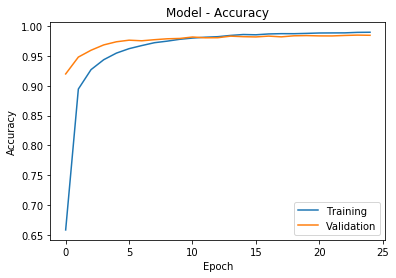

In [18]:
# Displaying accuracy graph with respect to epochs
fig1, ax_acc = plt.subplots()
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model - Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

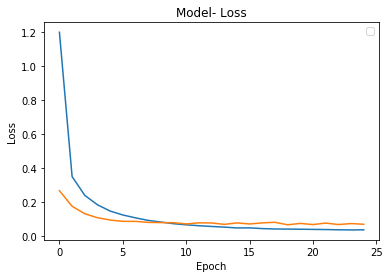

In [19]:
# Displaying Loss graph with respect to epochs
fig2, ax_loss = plt.subplots()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model- Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.show()

Actual Output :  digit_7 
Predicted output:  digit_7


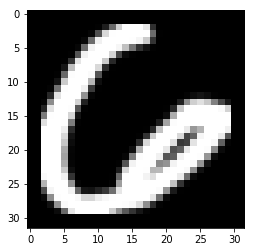

Actual Output :  character_34_chhya 
Predicted output:  character_34_chhya


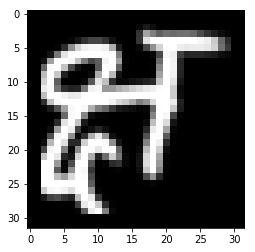

Actual Output :  character_7_chha 
Predicted output:  character_7_chha


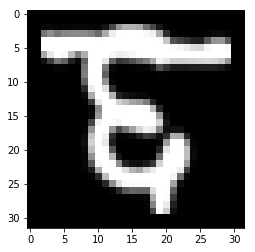

Actual Output :  character_5_kna 
Predicted output:  character_5_kna


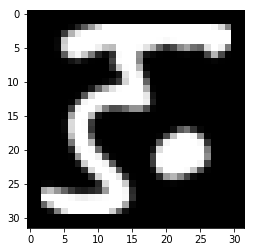

Actual Output :  character_33_ha 
Predicted output:  character_33_ha


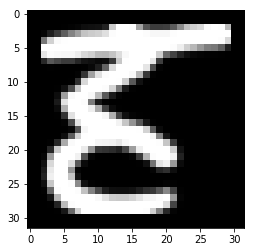

Actual Output :  character_17_tha 
Predicted output:  character_17_tha


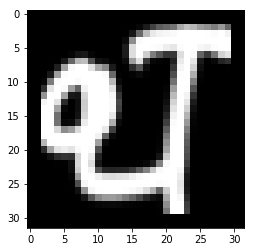

Actual Output :  character_23_ba 
Predicted output:  character_23_ba


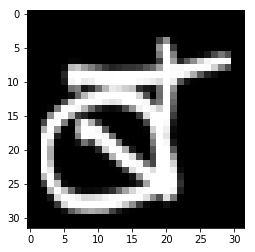

Actual Output :  character_11_taamatar 
Predicted output:  character_11_taamatar


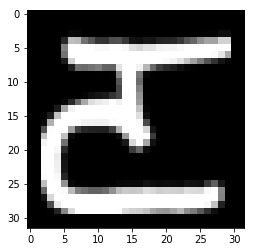

Actual Output :  character_34_chhya 
Predicted output:  character_34_chhya


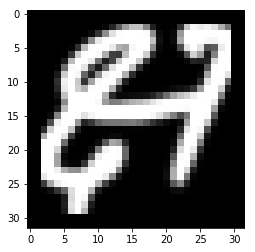

Actual Output :  character_25_ma 
Predicted output:  character_25_ma


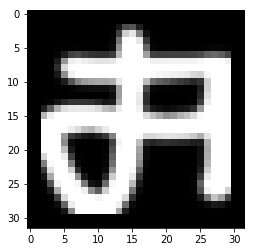

In [20]:
# Now testing on 10 random images taken from validation dataset
for i in range(10):
  rnd = np.random.randint(len(x_test))
  test_img = x_test[rnd].reshape((1,32,32,1))
  predict = model.predict(test_img)
  actual = labels[np.argmax(y_test[rnd])]
  predicted_text = labels[np.argmax(predict[0])]
  print('Actual Output : ' , actual , '\nPredicted output: ' , predicted_text)
  data = x_test[rnd].reshape((32,32))
  plt.imshow(data)
  plt.gray()
  plt.show()